In [1]:
#decision tree

# -*- coding: utf-8 -*-

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split  #nice function!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#os.chdir("C:\TREES")

"""
Data Engineering and Analysis
"""
#Load the dataset

AH_data = pd.read_csv("F://python//tree_addhealth.csv")

data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()

"""
Modeling and Prediction
"""
#Split into training and testing sets

predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

targets = data_clean.TREG1 # a column indicating response var(Target variable)

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape # rows x columns
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
classifier=DecisionTreeClassifier() #initialize model 
classifier=classifier.fit(pred_train,tar_train) #pass training data into the model 
 
predictions=classifier.predict(pred_test)     #too easy?!

sklearn.metrics.confusion_matrix(tar_test,predictions) #misclassification as matrix
sklearn.metrics.accuracy_score(tar_test, predictions)#rate

#all clear above

import pydotplus
from sklearn.externals.six import StringIO
#Displaying the decision tree
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

from io import StringIO

from IPython.display import Image

out = StringIO()
tree.export_graphviz(classifier, out_file=out)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())



ImportError: No module named 'StringIO'

[ 0.02647561  0.01545312  0.02752175  0.01615842  0.00852799  0.00663157
  0.06005304  0.05018904  0.05525616  0.11735476  0.01717839  0.01754035
  0.02773171  0.05690395  0.05494865  0.05278375  0.01643013  0.07057935
  0.06248044  0.07321123  0.01237076  0.05485343  0.05313002  0.04623639]


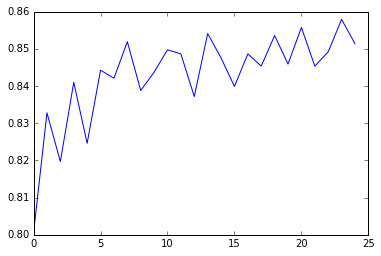

In [12]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
#import pylab as pl
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier



#Load the dataset

AH_data = pd.read_csv("F://python//tree_addhealth.csv")
data_clean = AH_data.dropna()

data_clean.dtypes
data_clean.describe()

#Split into training and testing sets

predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','age',
'ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1','ESTEEM1','VIOL1',
'PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]

targets = data_clean.TREG1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)  #regarding vars, accatually this is more important, since hard to interpret the tree, but get a sense


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
#plt.cla()
%matplotlib inline
plt.plot(trees, accuracy)
plt.show()

In [3]:
print(model.feature_importances_)

[ 0.02612845  0.01472674  0.02535983  0.01705249  0.00719557  0.00427984
  0.05797654  0.05553861  0.05156092  0.10253491  0.01707232  0.02083877
  0.02407806  0.05873596  0.05531034  0.05685593  0.01523378  0.08195556
  0.06422736  0.06943385  0.01313432  0.05850574  0.05234794  0.04991616]


In [4]:
import pylab as pl
plt.plot(trees, accuracy)
plt.show()

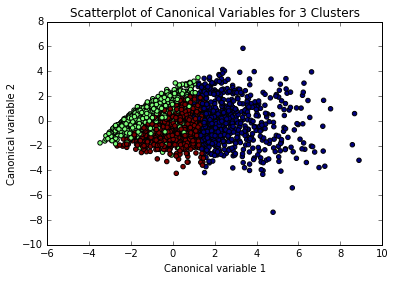

Clustering variable means by cluster
               index   ALCEVR1  MAREVER1  ALCPROBS1  DEVIANT1     VIOL1  \
cluster                                                                   
0        3310.964126  0.659134  1.096359   0.892032  1.097446  0.790445   
1        3239.829577 -1.056455 -0.474543  -0.412562 -0.451110 -0.264092   
2        3329.631626  0.946562 -0.050999  -0.049096 -0.110240 -0.163024   

             DEP1   ESTEEM1  SCHCONN1   PARACTV   PARPRES  FAMCONCT  
cluster                                                              
0        0.862170 -0.667255 -0.941736 -0.415299 -0.486130 -0.966053  
1       -0.292352  0.206912  0.341590  0.091216  0.156604  0.298288  
2       -0.197426  0.191902  0.135157  0.152276  0.104248  0.227935  
                            OLS Regression Results                            
Dep. Variable:                   GPA1   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077


In [3]:
#k-mean
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 18 19:51:29 2016

@author: jrose01
"""

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

"""
Data Management
"""
data = pd.read_csv("F://python//tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)  #change cols to upper case

# Data Management

data_clean = data.dropna()

# subset clustering variables
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]
cluster.describe()

# standardize clustering variables to have mean=0 and sd=1, not on a large scale
clustervar=cluster.copy()#get a copy
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64')) #astype: insure a numeric format
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123) #random number seed, insure randomly splited the same way
                                                                                     #if run the code again
#now ready to run the cluster analysis
# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)    #give us result of k=1..9 clusters
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])#sum each observation as center / num of observations, model.cluster_centers_ used here

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
%matplotlib inline
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA  #to visualize, create a small number of vars, - dimension reduction (linear comb of original vars)
%matplotlib inline
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)#plot_columns[:,0],first canonical var
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()
#red & blue not good seperation,choose k=2

#verify k=2 as well---each cluster distinct && meanningful?
"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']  #indicating each observation belong to which cluster

# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')  #get new dataframe with new col -- cluster
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

#see just how culsters differ on GPA
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=data_clean['GPA1']
# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])##ANOVA--compare group mean 
res1 = mc1.tukeyhsd()
print(res1.summary())

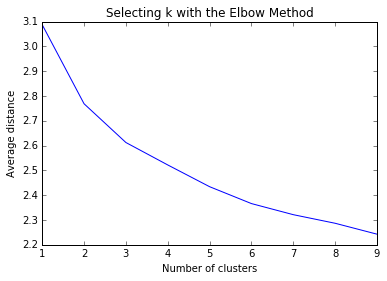

In [5]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


training data MSE
18.1485726641
test data MSE
17.2925174272
training data R-square
0.333611136927
test data R-square
0.31001113416


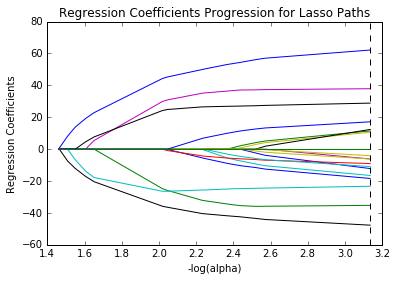

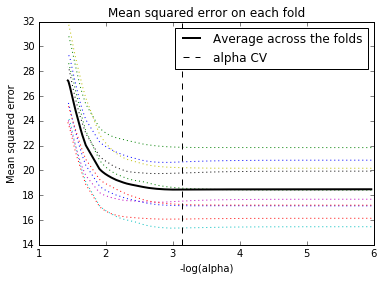

In [1]:
#LASSO: Least Absolute Selection and Shrinkage Operator, variable selection for linear reg mod
#when have less observations but more variables, shrinking the regression coeffients, smaller variance but not much increase in bias
#get rid of overfit and more interpreble
#lambda control panalty, increase-- more coeff reduce to 0(lambda=0----OLS)

# -*- coding: utf-8 -*-
"""
Created on Mon Dec 14 16:26:46 2015

@author: jrose01
"""

#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
 
#Load the dataset
data = pd.read_csv("F://python//tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1) #new var from existing var indicating weather male

#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.SCHCONN1  #target var
 
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model here:Least Angle Regression Algorithm
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train) #precompute matrix will speed up for large data set

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

%matplotlib inline
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)  #make them easier to read
ax = plt.gca() #set up axit
plt.plot(m_log_alphas, model.coef_path_.T) #.T transpose
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)
